In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
import pandas as pd
import seaborn as sn
DATADIR = "E:/level3 T1/selected-1/project1/Train"#put the path for your pc
testDATADIR = "E:/level3 T1/selected-1/project1/Test" #put the path for your pc

In [2]:
print("Processing Labels...")
CATEGORIES = os.listdir(DATADIR)
print("Labels Done!")
print(CATEGORIES)

Processing Labels...
Labels Done!
['cat', 'rabbit']


In [3]:
training_data = []
 
IMG_SIZE = 50
def create_training_data(training_data,CATEGORIES):
    for category in CATEGORIES:  # do dogs and cats
 
        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat
        print(path)
        for img in os.listdir(path):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
                #plt.imshow(img_array, cmap='gray')  # graph it
               # plt.show()  # display!
            except Exception as e:  # in the interest in keeping the output clean...
                pass

In [4]:
create_training_data(training_data,CATEGORIES)
DATADIR = "E:/level3 T1/selected-1/project1/Test" #put the path for your pc
 
print("Processing Labels...")
CATEGORIES = os.listdir(DATADIR)
print("Labels Done!")
print(CATEGORIES)
testing_data = []
create_training_data(testing_data,CATEGORIES)
 
print(len(testing_data))
print(len(training_data))
import random

E:/level3 T1/selected-1/project1/Train\cat
E:/level3 T1/selected-1/project1/Train\rabbit
Processing Labels...
Labels Done!
['cat', 'rabbit']
E:/level3 T1/selected-1/project1/Test\cat
E:/level3 T1/selected-1/project1/Test\rabbit
429
1600


In [5]:
random.shuffle(training_data)
random.shuffle(testing_data)
for sample in training_data[:10]:
    print(sample[1]) # print the label of first 10 values
 
x_train = []
y_train = []
 
for features,label in training_data:
    x_train.append(features)
    y_train.append(label)
x_test = []
y_test = []
 
for features, label in training_data:
    x_test.append(features)
    y_test.append(label)

1
1
1
1
1
1
1
1
0
1


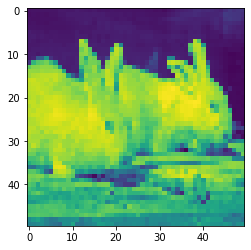

1


In [6]:
x_train = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
#print(x_train[0])
plt.imshow(x_train[0]) # for black and white ,cmap=plt.cm.binary (color map)
plt.show()
print(y_train[0])
#Let's save this data, so that we don't need to keep calculating it every time we want to play with the neural network model:
import pickle
 
pickle_out = open("x_train.pickle","wb")
pickle.dump(x_train, pickle_out)
pickle_out.close()
 
pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()
#We can always load it in to our current script, or a totally new one by doing:
pickle_in = open("x_train.pickle","rb")
x_train= pickle.load(pickle_in)

typeeeeeee<class 'numpy.ndarray'>


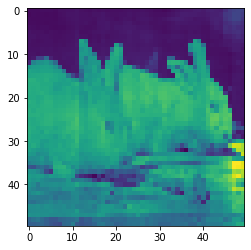

<class 'numpy.ndarray'>


In [7]:
pickle_in = open("y_train.pickle","rb")
y_train = pickle.load(pickle_in)
print("typeeeeeee"+str(type(x_train)))
#x_train = x_train/255.0
x_train = tf.keras.utils.normalize(x_train,axis=1) # scalling the data between 0 and 1
x_test = tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0]) # for black and white ,cmap=plt.cm.binary (color map)
plt.show()
# Build the model
model = tf.keras.models.Sequential() #build model
model.add(tf.keras.layers.Flatten())#we need to take this 28x28 image, and make it a flat 1x784.
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) #128 the number of the node
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) #128 the number of the node
model.add(tf.keras.layers.Dense(2,activation=tf.nn.softmax)) #out layer  # our output layer. 10 units for 10 classes. Softmax for probability distribution
model.compile( optimizer='adam' ,# like gradient descent
               loss = 'sparse_categorical_crossentropy',# for categorial
               metrics=['accuracy'] )#A metric is a function that is used to judge the performance of your model.
print(type(x_train))
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test= np.array(x_test)
y_test = np.array(y_test)

Epoch 1/50
256/256 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5555
Epoch 00001: val_loss improved from inf to 0.64856, saving model to weights.h5
256/256 [==============================] - 7s 27ms/step - loss: 0.6931 - accuracy: 0.5555 - val_loss: 0.6486 - val_accuracy: 0.6062
Epoch 2/50
255/256 [============================>.] - ETA: 0s - loss: 0.6425 - accuracy: 0.6055
Epoch 00002: val_loss improved from 0.64856 to 0.60551, saving model to weights.h5
256/256 [==============================] - 4s 14ms/step - loss: 0.6423 - accuracy: 0.6055 - val_loss: 0.6055 - val_accuracy: 0.6687
Epoch 3/50
256/256 [==============================] - ETA: 0s - loss: 0.6291 - accuracy: 0.6148
Epoch 00003: val_loss did not improve from 0.60551
256/256 [==============================] - 4s 15ms/step - loss: 0.6291 - accuracy: 0.6148 - val_loss: 0.6111 - val_accuracy: 0.6625
Epoch 4/50
252/256 [============================>.] - ETA: 0s - loss: 0.6476 - accuracy: 0.6175
Epoch 0

Epoch 29/50
255/256 [============================>.] - ETA: 0s - loss: 0.2831 - accuracy: 0.8761
Epoch 00029: val_loss did not improve from 0.51565
256/256 [==============================] - 3s 10ms/step - loss: 0.2828 - accuracy: 0.8758 - val_loss: 0.8730 - val_accuracy: 0.7281
Epoch 30/50
256/256 [==============================] - ETA: 0s - loss: 0.2499 - accuracy: 0.8953
Epoch 00030: val_loss did not improve from 0.51565
256/256 [==============================] - 3s 11ms/step - loss: 0.2499 - accuracy: 0.8953 - val_loss: 0.5167 - val_accuracy: 0.8344
Epoch 31/50
251/256 [============================>.] - ETA: 0s - loss: 0.2271 - accuracy: 0.9084
Epoch 00031: val_loss did not improve from 0.51565
256/256 [==============================] - 3s 12ms/step - loss: 0.2275 - accuracy: 0.9078 - val_loss: 0.7155 - val_accuracy: 0.7563
Epoch 32/50
253/256 [============================>.] - ETA: 0s - loss: 0.2784 - accuracy: 0.8830
Epoch 00032: val_loss improved from 0.51565 to 0.51451, saving 

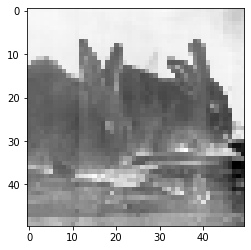

In [8]:
import keras
checkpoint = keras.callbacks.ModelCheckpoint(filepath="weights.h5", verbose=1, save_best_only=True)
history = model.fit(x_train, y_train, epochs=50, batch_size=5, verbose=1, validation_split=0.2, callbacks=[checkpoint]) # train the model
 
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)
predictions = model.predict(x_test)
model.save('epic_num_reader.model')
#new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = model.predict(x_test)
#print(predictions)
print(np.argmax(predictions[0]))#That sure doesn't start off as helpful,
# but recall these are probability distributions. We can get the actual number pretty simply:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2500)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               320128    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
Total params: 336,898
Trainable params: 336,898
Non-trainable params: 0
_________________________________________________________________
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


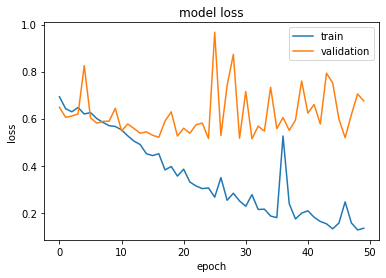

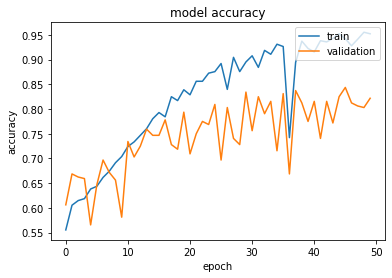

In [9]:
model.summary()
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
 

1600
1600


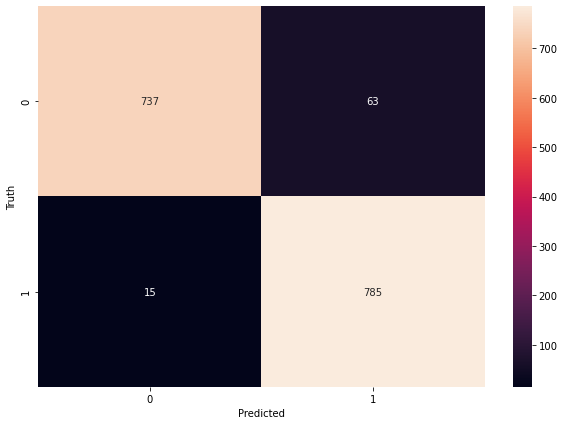

In [10]:
##Confusion Matrix
pre = []
predictions = model.predict(x_test)
for value in predictions:
    pre.append(np.argmax(value))
pre = np.array(pre)
print(len(pre))
print(len(y_test))
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
confusion_matrix(y_true=y_test ,y_pred=pre)
#Confusion Matrix
def plot_confusion_matrix(predicted_dataset, y_test):
    y_predicted_labels = predicted_dataset
    confusion_matrix = tf.math.confusion_matrix(labels=y_test,
                                                predictions=y_predicted_labels)
    plt.figure(figsize=(10, 7))
    sn.heatmap(confusion_matrix, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()
plot_confusion_matrix(pre,y_test)
 

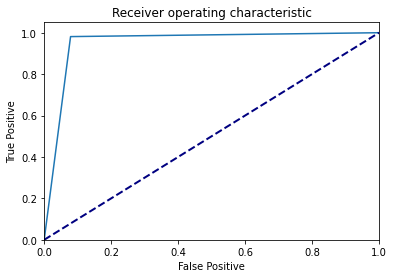

In [11]:
#ROC GRAPH
from sklearn.metrics import roc_curve, auc, roc_auc_score
def show_roc_curve(prediction, Y_test):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = roc_curve(Y_test, prediction)
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure()
    plt.plot(fpr[1], tpr[1])
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.title('Receiver operating characteristic')
    plt.show()
 
show_roc_curve(pre, y_test)